In [61]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [62]:
# 1.Loading The Automobile Data
print("1(A).Loading The Automobile Data")
your_local_path="C:/Users/ikhus/upX_Foundation_Course Projects/"
Automobile=pd.read_csv(your_local_path +"Automobile_data.txt")

1(A).Loading The Automobile Data


In [63]:
Automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [64]:
#information abt Automobile data set
#AM_cols=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
         #'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
#Automobile=pd.read_csv(your_local_path +"Automobile_data.txt",names=AM_cols,encoding='UTF-8')
Automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [65]:
Automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [66]:
################## cleaning the data ##############
# Cleaning of Data, drop the empty row from dataset
print("1(B). Cleaning of Data ")
Automobile.dropna(how="all", inplace=True)  #  the empty row is removed.
Automobile


# replace value
#num-of-doors = {'4wd':'Fwd'}
#Automobile.num-of-doors[Automobile.num-of-doors == '4wd'] = 'fwd'
#Automobile['num-of-doors'] = [num-of-doors[item] for item in Automobile.num-of-doors]

1(B). Cleaning of Data 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [67]:
#Automobile['normalized-losses'].loc[Automobile['normalized-losses'] == '?'].value_count()

In [68]:
# Find out data having '?' value for normalized losses and replace it with mean. 
nl_notmissing=Automobile['normalized-losses'].loc[Automobile['normalized-losses']!='?']
nlmean=nl_notmissing.astype(str).astype(int).mean()
Automobile['normalized-losses']=Automobile['normalized-losses'].replace('?',nlmean).astype(int)
Automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [69]:
# Find out data having '?' value for horsepower and replace it with mean. 
Automobile['horsepower'].str.isnumeric().value_counts()
nl_notmissingH=Automobile['horsepower'].loc[Automobile['horsepower']!='?']
nlmeanH=nl_notmissingH.astype(str).astype(float).mean()
Automobile['horsepower']=Automobile['horsepower'].replace('?',nlmeanH).astype(int)
Automobile['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [70]:
# Find out data having '?' value for bore and replace it with mean.
print("Data having '?' value for bore")
print(Automobile['bore'].loc[Automobile['bore'] == '?'])
Automobile['bore'].str.isnumeric().value_counts()
nl_notmissingB=Automobile['bore'].loc[Automobile['bore']!='?']
nlmeanB=nl_notmissingB.astype(str).astype(float).mean()
Automobile['bore']=Automobile['bore'].replace('?',nlmeanB).astype(float)
Automobile['bore'].head()

Data having '?' value for bore
55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object


0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [71]:
# Find out data having '?' value for stroke and replace it with mean. 
print("Data having '?' value for stroke")
print(Automobile['stroke'].loc[Automobile['stroke'] == '?'])
Automobile['stroke'].str.isnumeric().value_counts()
nl_notmissingS=Automobile['stroke'].loc[Automobile['stroke']!='?']
nlmeanS=nl_notmissing.astype(str).astype(float).mean()
Automobile['stroke']=Automobile['stroke'].replace('?',nlmeanS).astype(float)
Automobile['stroke'].head()

Data having '?' value for stroke
55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object


0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [72]:
# Find out data having '?' value for peak-rpm and replace it with mean.
print("Data having '?' value for peak-rpm")
print(Automobile['peak-rpm'].loc[Automobile['peak-rpm'] == '?'])
Automobile['peak-rpm'].str.isnumeric().value_counts()
nl_notmissingP=Automobile['peak-rpm'].loc[Automobile['peak-rpm']!='?']
nlmeanP=nl_notmissingP.astype(str).astype(float).mean()
Automobile['peak-rpm']=Automobile['peak-rpm'].replace('?',nlmeanP).astype(float)
Automobile['peak-rpm'].head()

Data having '?' value for peak-rpm
130    ?
131    ?
Name: peak-rpm, dtype: object


0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [73]:
################## cleaning the price data ##############
print("*) Number of values which are not numeric in Price column") 
print(Automobile['price'].str.isnumeric().value_counts())    # Find out the number of values which are not numeric
print("*) List of values which are not numeric")
print(Automobile['price'].loc[Automobile['price'].str.isnumeric() == False])   # List out the values which are not numeric

*) Number of values which are not numeric in Price column
True     201
False      4
Name: price, dtype: int64
*) List of values which are not numeric
9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object


In [74]:
#Find out data having '?' value for Price and replace it with mean. 
print("2. Variable analysis on automobile pricing")
nl_notmissing=Automobile['price'].loc[Automobile['price']!='?']
nlmean=nl_notmissing.astype(str).astype(float).mean()
Automobile['price']=Automobile['price'].replace('?',nlmean).astype(int)
print(Automobile['price'].head())

2. Variable analysis on automobile pricing
0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32


In [75]:
# remove the records which are having the value '?'
Automobile['num-of-doors'].loc[Automobile['num-of-doors'] == '?']
Automobile = Automobile[Automobile['num-of-doors'] != '?']
Automobile['num-of-doors'].loc[Automobile['num-of-doors'] == '?']

#print(Automobile['num-of-doors'])

Series([], Name: num-of-doors, dtype: object)

In [76]:
Automobile

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500.0,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500.0,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500.0,16,22,13207


In [77]:
print("3. Summary Statistics of different variable")
Automobile.describe()

3. Summary Statistics of different variable


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330931,5.593892,10.093202,104.463054,5125.865709,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.271327,16.547416,3.888216,39.612384,477.438883,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.435000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,122.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [78]:
# 4.A) Univariate Analysis (Uni-variate analysis will depend on whether the variable type is categorical or continuous.)
Automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


In [79]:
# 4.A) Univariate Analysis (Uni-variate analysis will depend on whether the variable type is categorical or continuous.)
A=pd.DataFrame(Automobile)
A.to_csv('out.csv', index=False, header=False)
A

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500.0,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500.0,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500.0,16,22,13207


In [80]:
file = open("AutomobileD.txt","w")
file.write(str(Automobile))
file.close()

In [81]:
### Univariate Analysis
Automobile.shape

(203, 26)

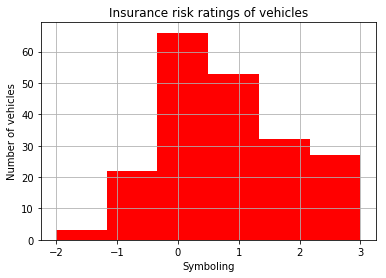

In [82]:
Automobile.symboling.hist(bins=6,color='Red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Symboling');

toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
mercedes-benz     8
Name: make, dtype: int64


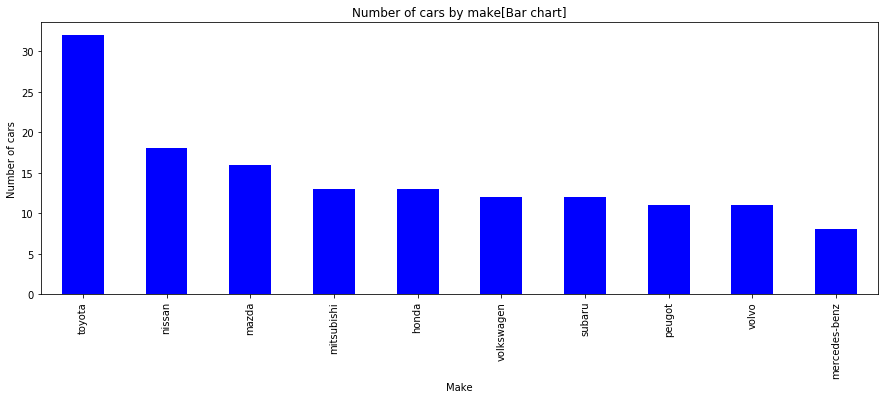

In [83]:
# 'make' frequency Diagram(using Bar chart)
my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
Automobile['make'].value_counts().head(10).plot(kind='bar',figsize=(15,5),color=my_colors)
#plt.figure(figsize=(10,6))
plt.title("Number of cars by make[Bar chart]")
plt.ylabel('Number of cars')
plt.xlabel('Make');
print(Automobile['make'].value_counts().head(10))

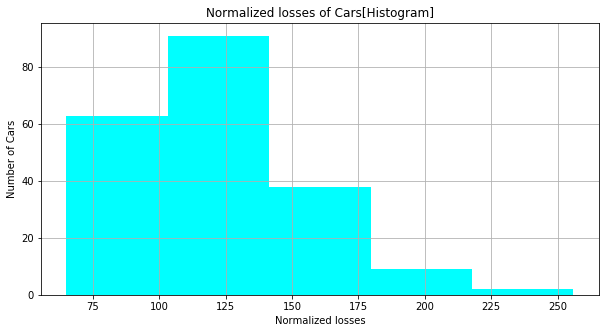

In [84]:
# Normalized losses histogram
plt.figure(figsize=(10,5))
Automobile['normalized-losses'].hist(bins=5,color='Cyan');
plt.title("Normalized losses of Cars[Histogram]")
plt.ylabel('Number of Cars')
plt.xlabel('Normalized losses');

Text(0.5,0,'Aspiration')

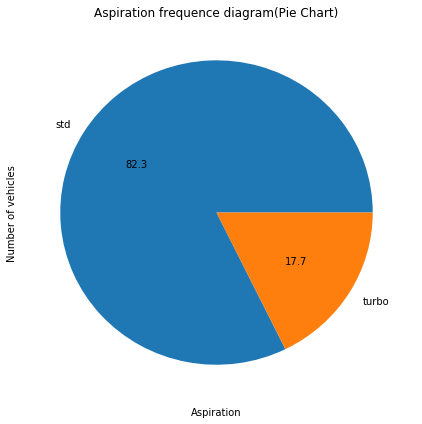

In [85]:
Automobile['aspiration'].value_counts().plot.pie(figsize=(7,7),autopct="%.1f")
plt.title("Aspiration frequence diagram(Pie Chart)")
plt.ylabel('Number of vehicles')
plt.xlabel('Aspiration')

Text(0.5,0,'Fuel type')

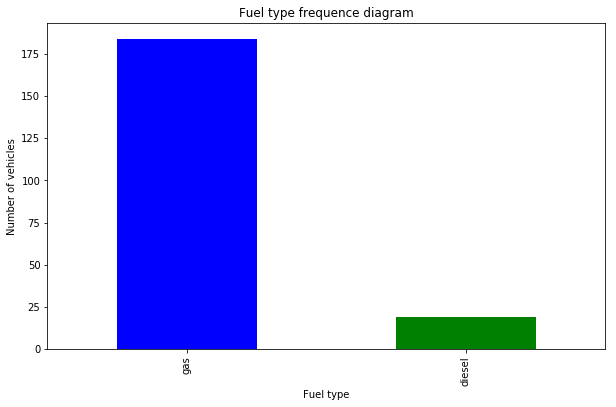

In [86]:
#plt.rcParams['figure.figsize']=(20,10)
#ax = sns.boxplot(x="fuel-type", y="make", data=Automobile)
plt.figure(figsize=(10,6))
Automobile['fuel-type'].value_counts().plot(kind='bar',color='BG')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

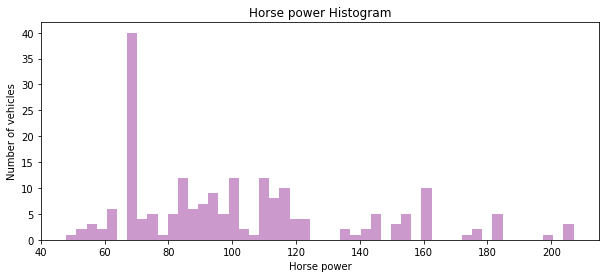

In [87]:
#Horse power histogram
plt.figure(figsize=(10,4))
sns.distplot(Automobile.horsepower[np.abs(Automobile.horsepower-Automobile.horsepower.mean())<=(3*Automobile.horsepower.std())],kde=False,bins=50,color='purple')
plt.title("Horse power Histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');
#print(Automobile.horsepower[np.abs(Automobile.horsepower-Automobile.horsepower.mean())<=(3*Automobile.horsepower.std())].hist(bins=5,color='Blue'))

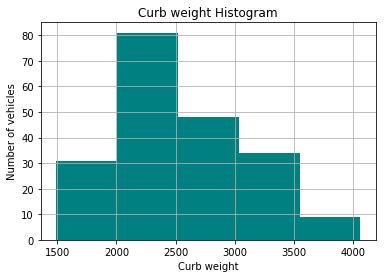

In [88]:
#reviews['points'].value_counts().sort_index().plot.line()
Automobile['curb-weight'].hist(bins=5,color='teal');
plt.title("Curb weight Histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

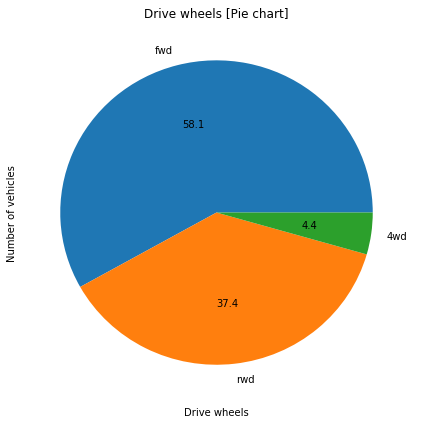

In [89]:
Automobile['drive-wheels'].value_counts().plot.pie(figsize=(7,7),autopct="%.1f")
#print(Automobile['drive-wheels'].value_counts().plot(kind='bar',color='RBG'))
plt.title("Drive wheels [Pie chart]")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

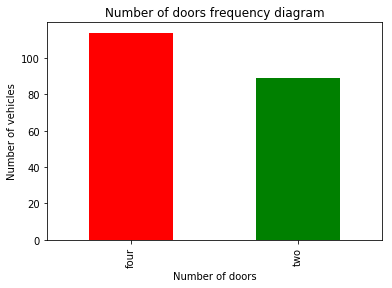

In [90]:
#colors=['o','n']
Automobile['num-of-doors'].value_counts().plot(kind='bar',color='rg')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

In [91]:
'''Findings
*We have taken some key features of the automobile dataset for this analysis and below are our findings.

1)Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
2)Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
3)For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. 
    There are very less number of cars for four wheel drive.
4)Curb weight of the cars are distributed between 1500 and 4000 approximately
5)Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2.
    There are more cars in the range of 0 and 1.
6)Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range
    between 65 and 150.'''

'Findings\n*We have taken some key features of the automobile dataset for this analysis and below are our findings.\n\n1)Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan\n2)Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice\n3)For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. \n    There are very less number of cars for four wheel drive.\n4)Curb weight of the cars are distributed between 1500 and 4000 approximately\n5)Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2.\n    There are more cars in the range of 0 and 1.\n6)Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range\n    between 65 and 150.'

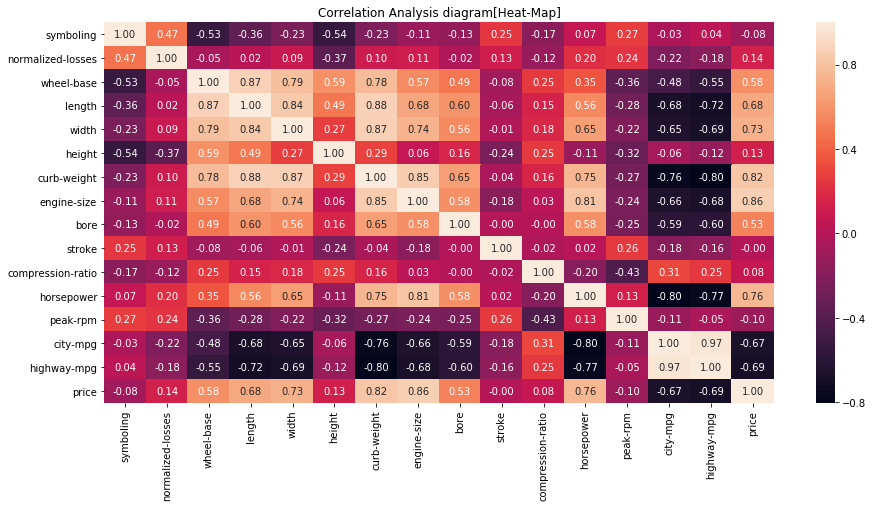

In [92]:
A=Automobile.corr()
plt.figure(figsize=(15,7))
plt.title("Correlation Analysis diagram[Heat-Map]")
sns.heatmap(A,annot=True, fmt='.2f')

In [93]:
#####################################  BIvariate Analysis ####################################

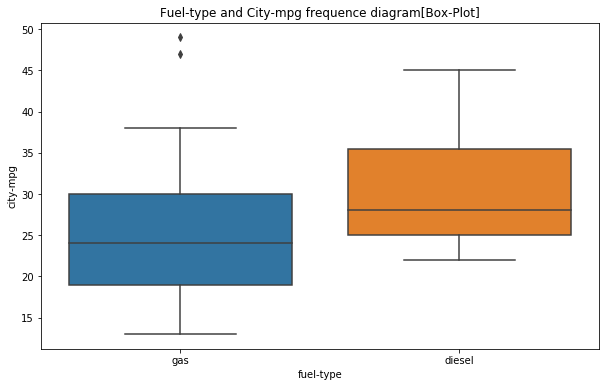

In [94]:
plt.figure(figsize=(10,6))
plt.title("Fuel-type and City-mpg frequence diagram[Box-Plot]")
plt.ylabel('city mpg')
plt.xlabel('Fuel type')
f=Automobile['fuel-type']
c=Automobile['city-mpg']
sns.boxplot(f,c)

In [95]:
#sns.jointplot(x="horsepower", y="city-mpg", data=Automobile)

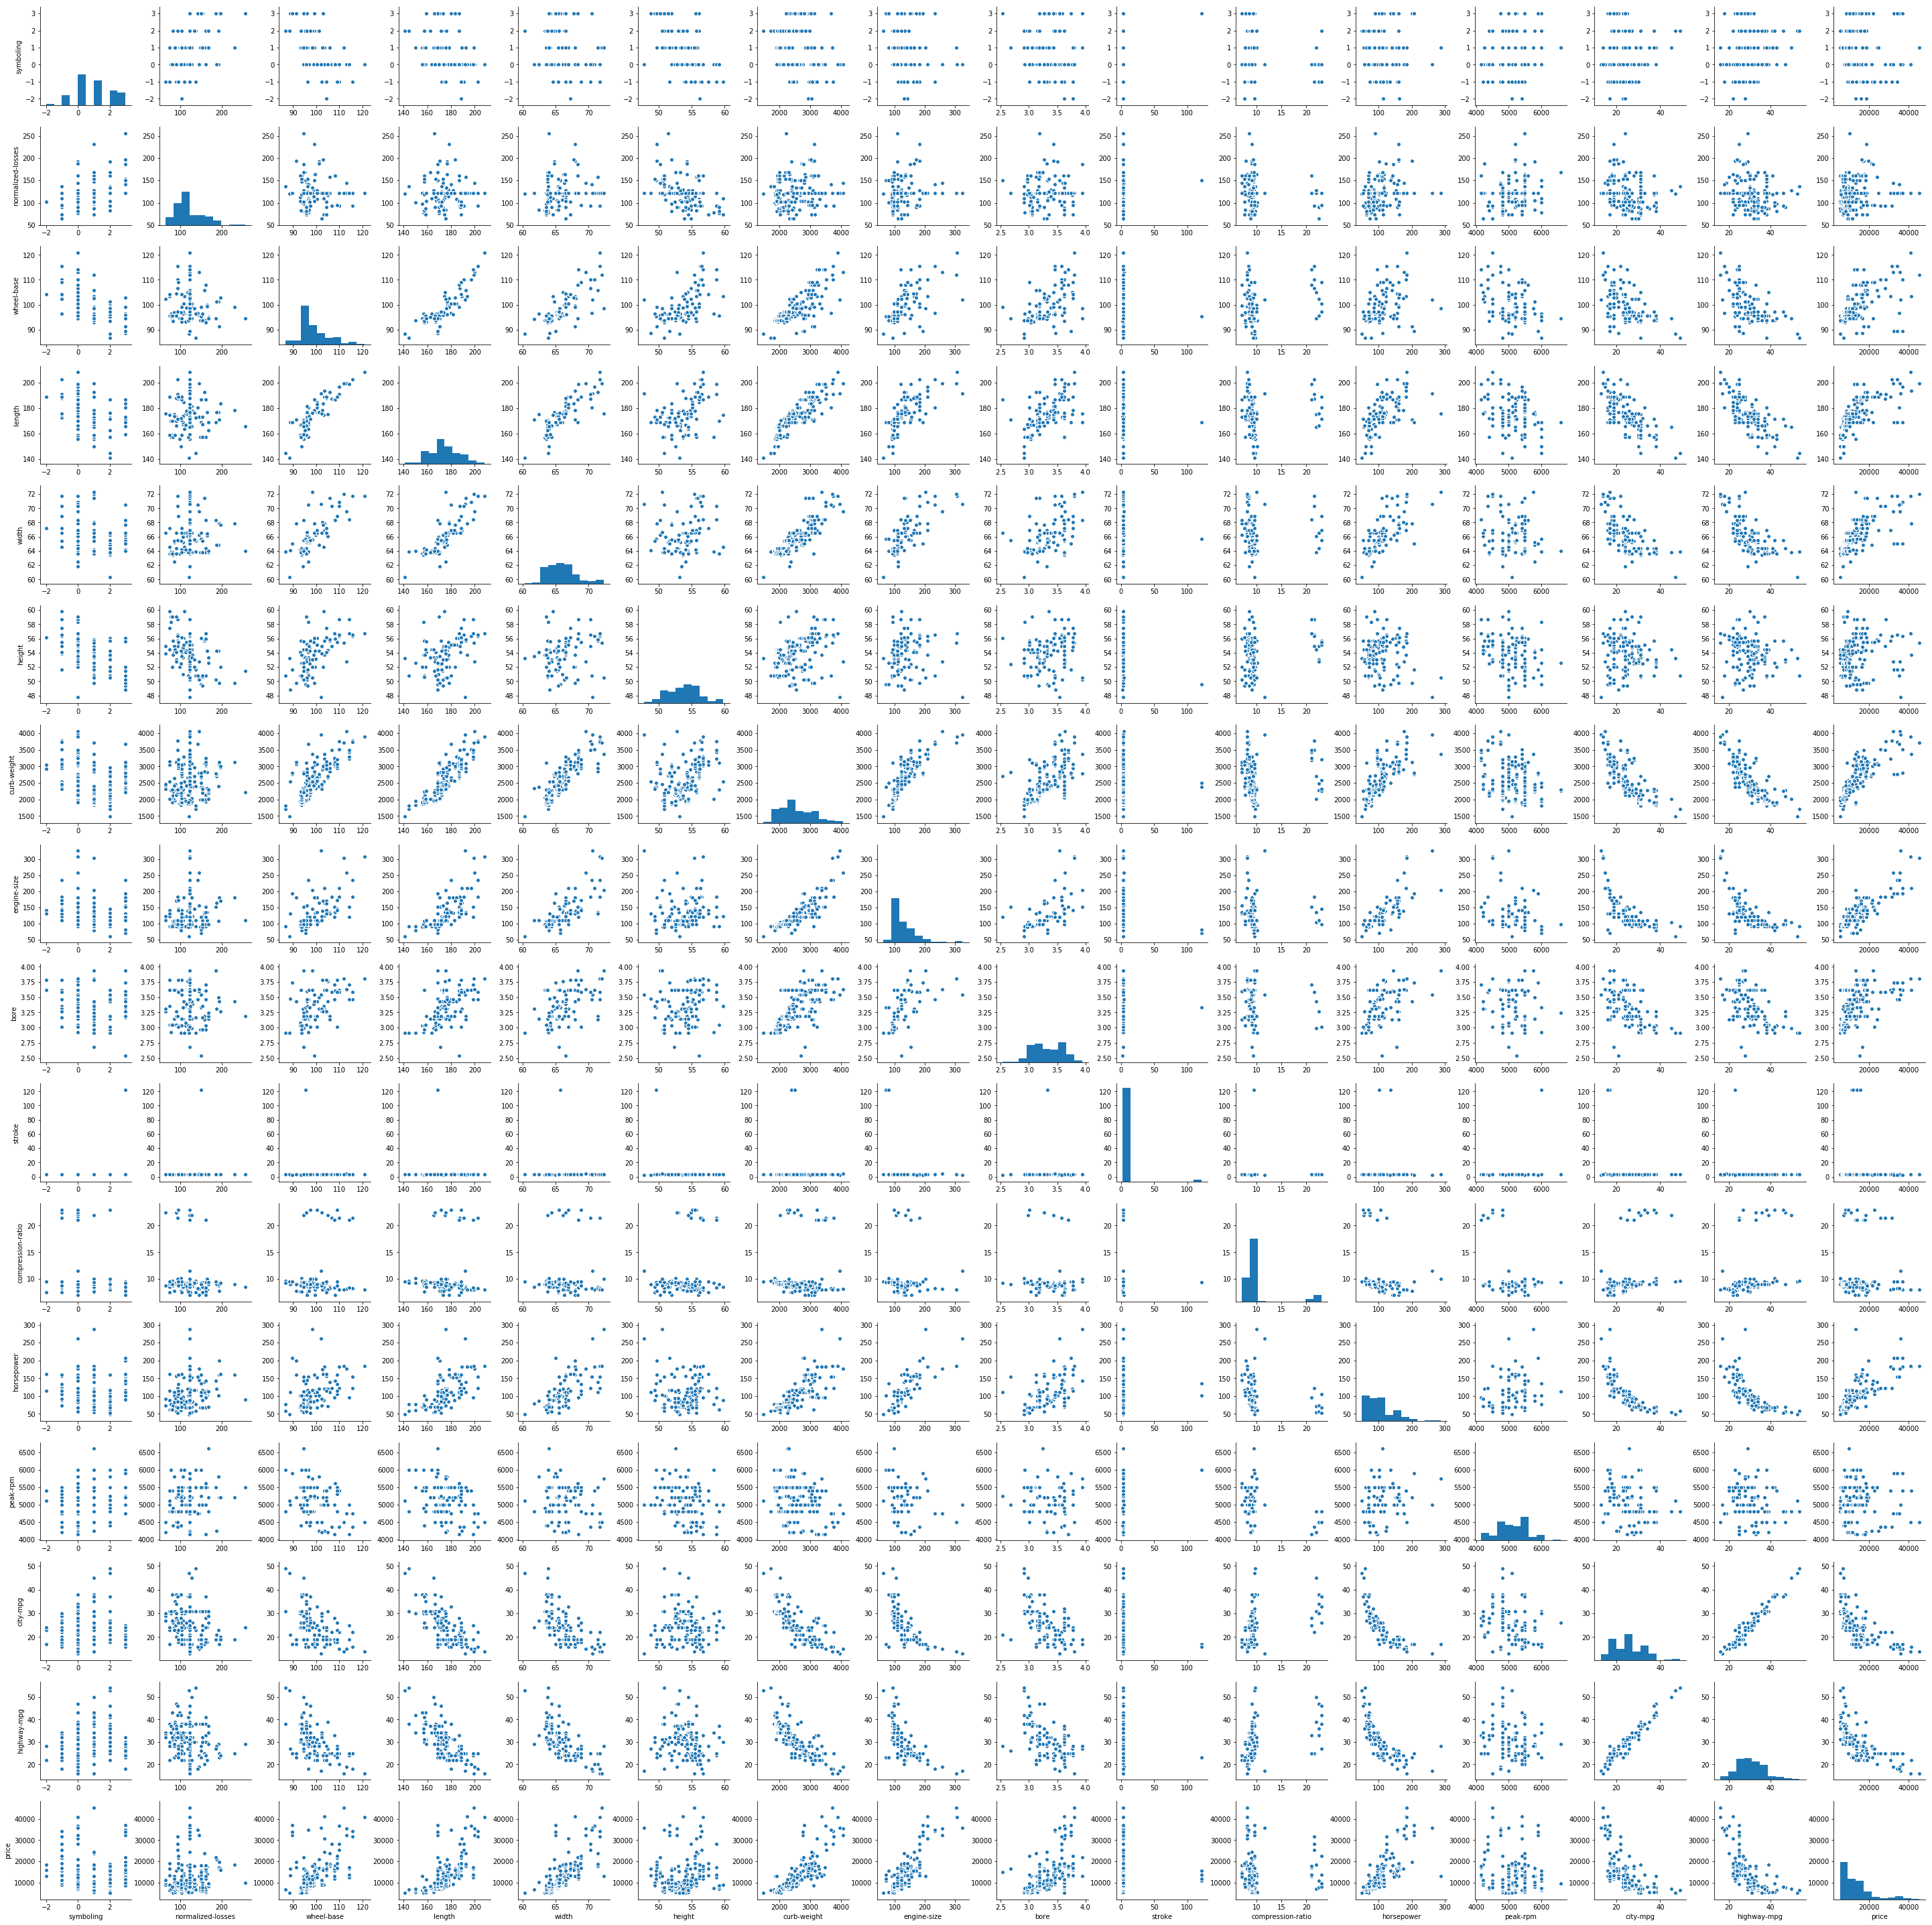

In [96]:
sns.pairplot(Automobile,palette="Set2")

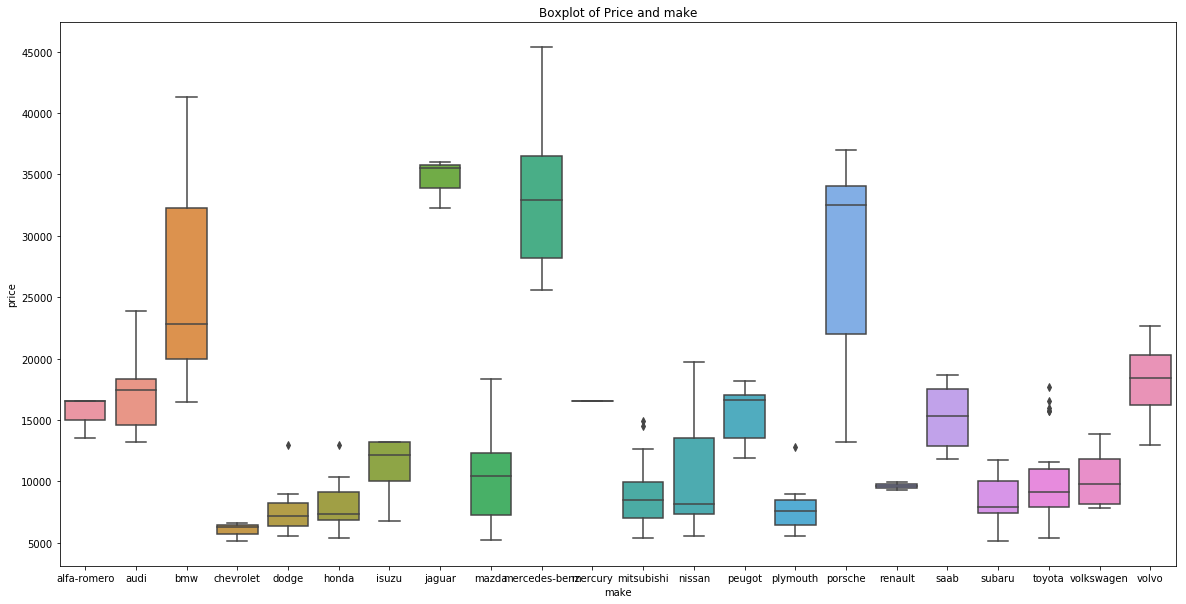

In [97]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of Price and make")
plt.ylabel('make')
plt.xlabel('price')
ax = sns.boxplot(x="make", y="price", data=Automobile)

Scatter plot of price and engine size


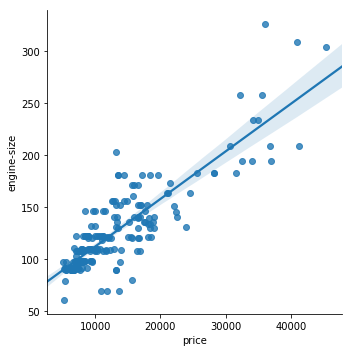

In [98]:
print("Scatter plot of price and engine size")
Automobile
sns.lmplot('price',"engine-size", Automobile) #Find:The more the engine size the Highest the price is


joint plot of symboling and normalized-losses


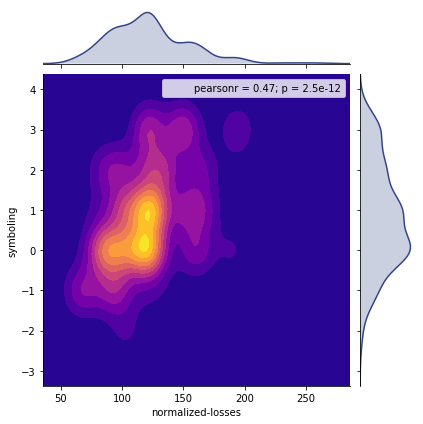

In [99]:
print("joint plot of symboling and normalized-losses")
sns.jointplot(x='normalized-losses',y="symboling",data=Automobile, kind='kde',color="#334488",cmap='plasma')
              #, data=Automobile,kind='kde')

Scatter plot of normalized losses and symboling


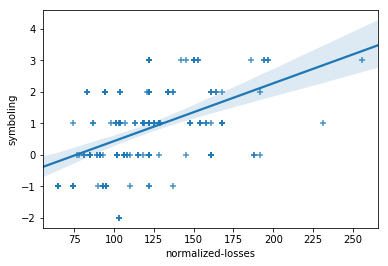

In [100]:
print("Scatter plot of normalized losses and symboling")
sns.regplot(x="normalized-losses", y="symboling", data=Automobile,marker="+")

Scatter plot of Engine size and Peak RPM


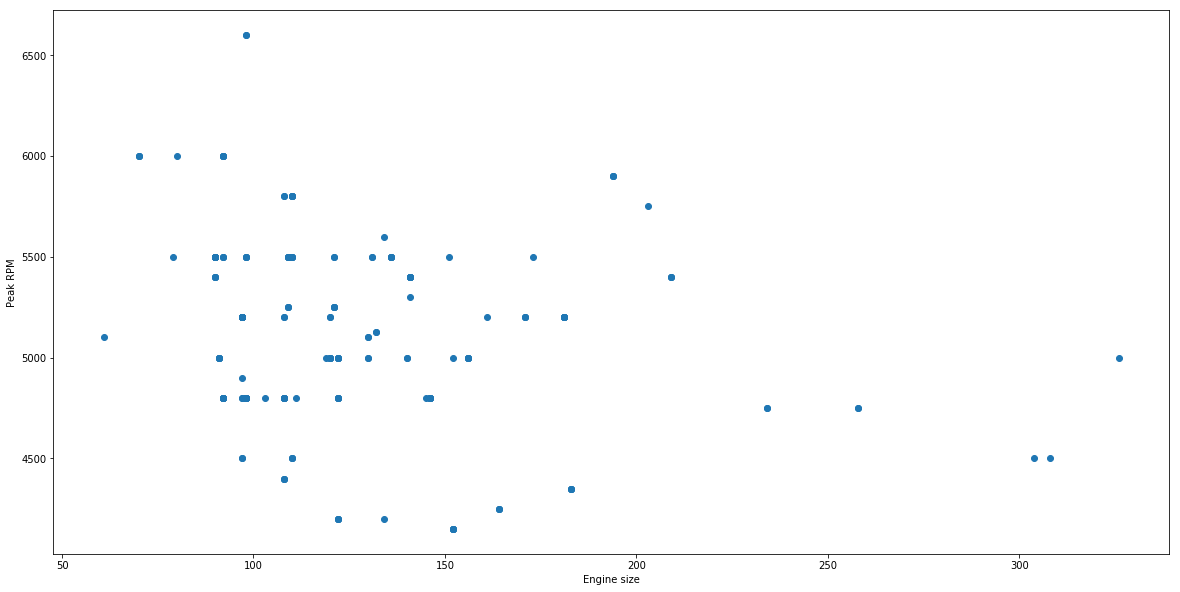

In [101]:
plt.figure(figsize=(20,10))
print("Scatter plot of Engine size and Peak RPM")
plt.scatter(Automobile['engine-size'],Automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

AxesSubplot(0.125,0.125;0.775x0.755)


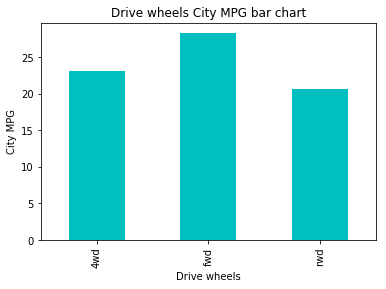

In [102]:
print(Automobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'c'))
plt.title("Drive wheels City MPG bar chart")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');


Drive wheels and City MPG bar chart
AxesSubplot(0.125,0.125;0.775x0.755)


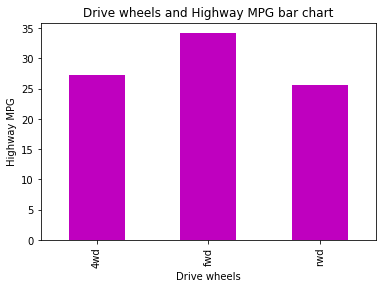

In [103]:
print("Drive wheels and City MPG bar chart")
print(Automobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'm'))
plt.title("Drive wheels and Highway MPG bar chart")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

Scatter plot of City and Highway MPG, Curb weight based on Make of the car


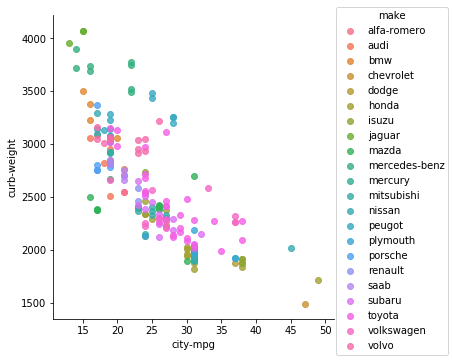

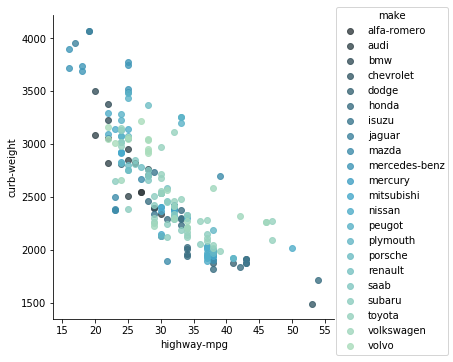

In [104]:
print("Scatter plot of City and Highway MPG, Curb weight based on Make of the car")
print(sns.lmplot('city-mpg',"curb-weight", Automobile, hue="make", fit_reg=False))
print(sns.lmplot('highway-mpg',"curb-weight", Automobile, hue="make",fit_reg=False,palette="GnBu_d"))
#ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#ax4.plot(x, 2 * y ** 2 - 1, color='r')

Boxplot of Drive wheels and Price


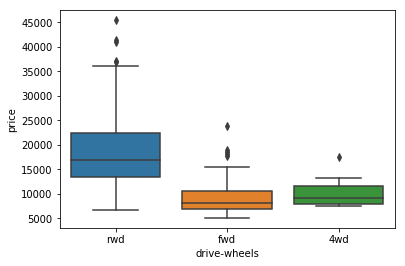

In [105]:
print("Boxplot of Drive wheels and Price")
P_Dw=sns.boxplot(x="drive-wheels", y="price", data=Automobile)

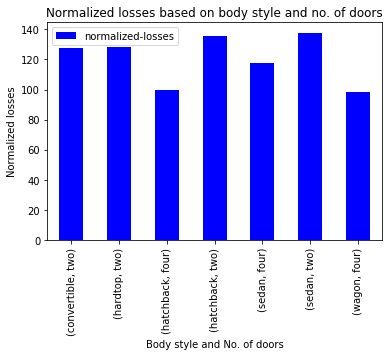

In [106]:
#color_names = ['g', 'b', 'peachpuff', 'fuchsia','c','m','y'] 
my_colors = ['b', 'r', 'c', 'y', 'g', 'm','k']
plt.figure(figsize=(20,25))
pd.pivot_table(Automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color=my_colors)
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');